In [3]:
import argparse
import numpy as np
import pandas as pd
import pickle
import ast, os, sys
import neuroglancer
import matplotlib
import cv2
from skimage import img_as_ubyte
from matplotlib import pyplot as plt

In [1]:
OUTPUT = '/home/eddyod/tmp/colors'

In [50]:
DIR = '/net/birdstore/Active_Atlas_Data/data_root/CSHL_volumes'
contourpath = '/net/birdstore/Active_Atlas_Data/data_root/CSHL_volumes/atlasV8/volume_test.npy'
structure = 'SC'
contourpath = os.path.join(DIR, 'atlasV7', 'score_volumes', 'Sp5O_R.npy')
input = np.load(contourpath)
contour = input.astype(np.uint8)

In [51]:
contour.dtype, contour.shape, np.median(contour), np.mean(contour), np.amax(contour)

(dtype('uint8'), (125, 201, 99), 0.0, 0.015368008442635308, 1)

In [58]:
colored_values = contour > 0
contour[colored_values[:,:,:]] = color

In [59]:
colored_values.shape

(125, 201, 99)

In [40]:
colors = {'Sp5O_R':23, 'SC':18, 'IC':11, 'Sp5C_R':21}
color = colors[structure]

In [41]:
Xx = np.all(contour > 0, axis=0) 
Xy = np.all(contour > 0, axis=1) 
Xz = np.all(contour > 0, axis=2) 

In [32]:
Xx.shape, Xy.shape, Xz.shape, contour.shape

((201, 99), (125, 99), (125, 201), (125, 201, 99))

In [48]:
xy_ng_resolution_um = 5
color_radius = 3
color_radius = color_radius * (10.0 / xy_ng_resolution_um) ** 0.5
scale_xy = 0.46 / xy_ng_resolution_um

In [49]:
scale_xy

0.092

In [43]:
#vm = np.swapaxes(contour,0,2)
vm = contour
vm.shape, vm.dtype

((125, 201, 99), dtype('uint8'))

In [5]:
vm = np.swapaxes(contour,0,2)
#vm = contour
vm.dtype, vm.shape

(dtype('uint8'), (1429, 1099, 288))

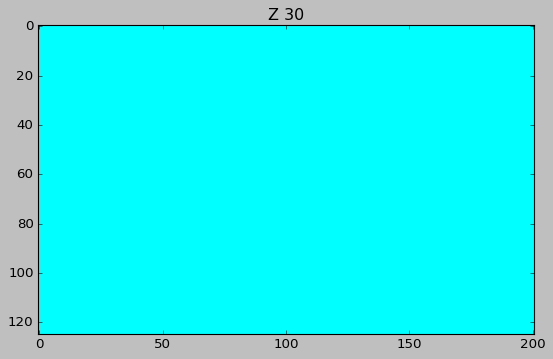

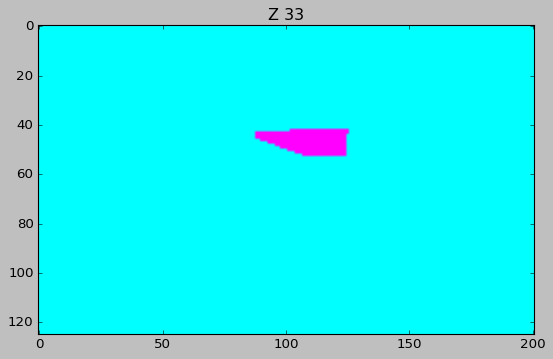

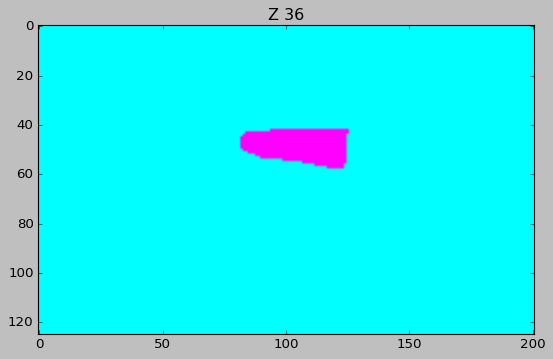

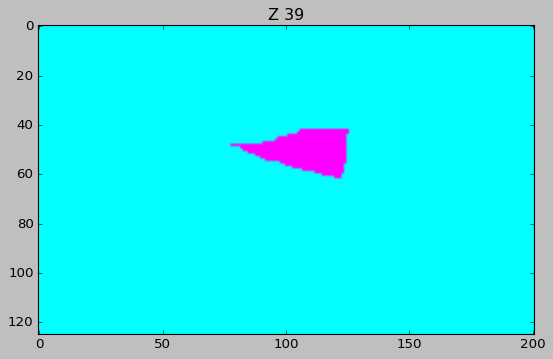

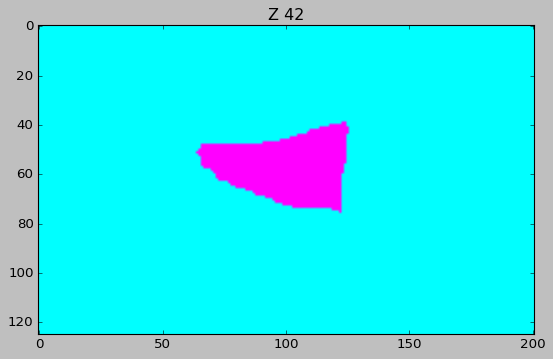

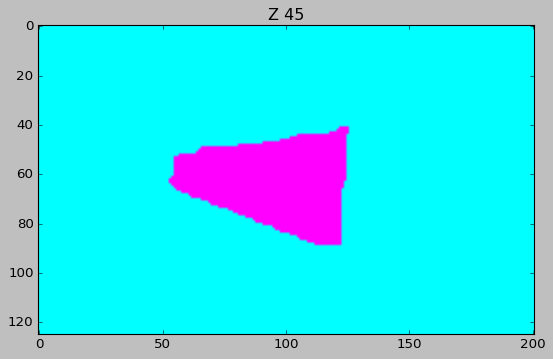

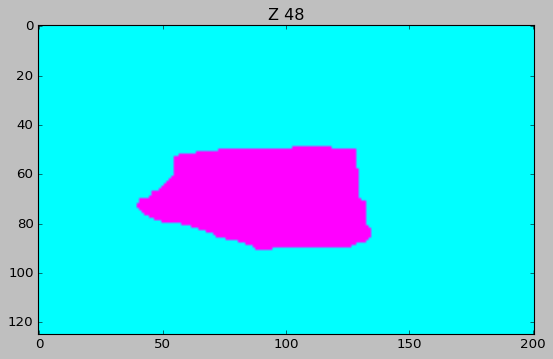

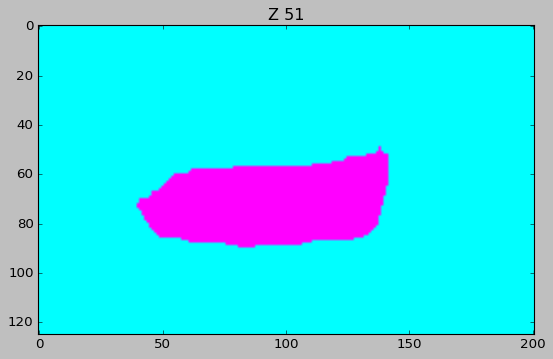

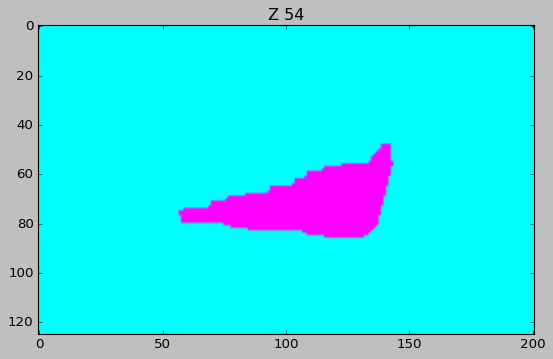

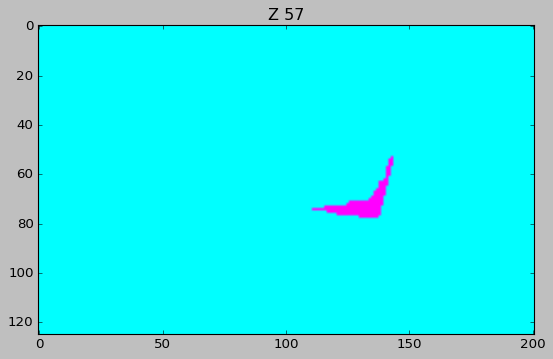

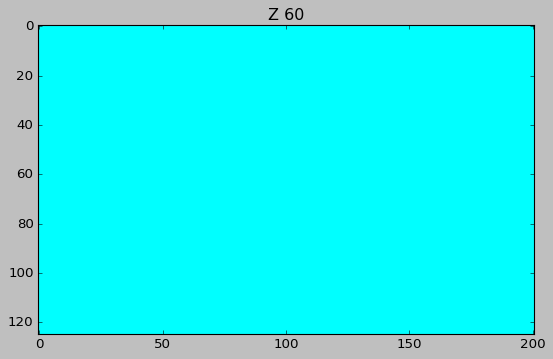

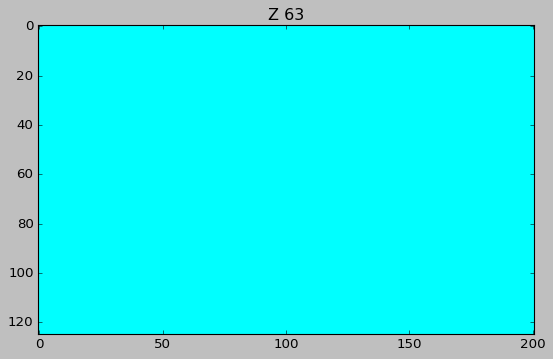

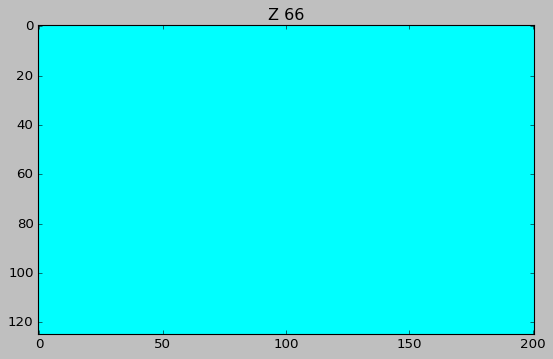

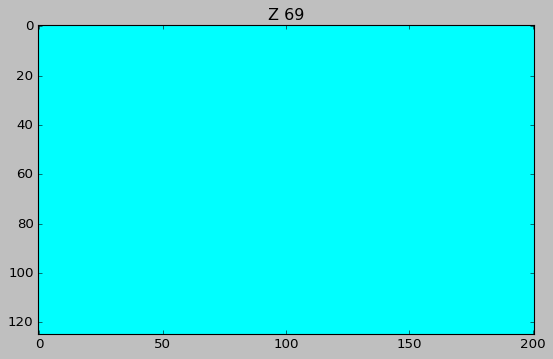

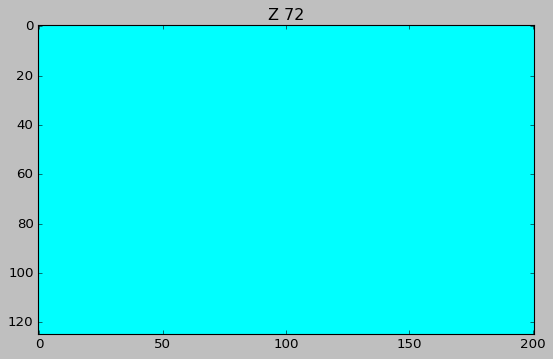

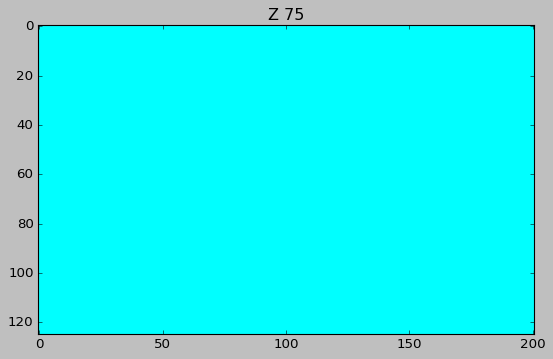

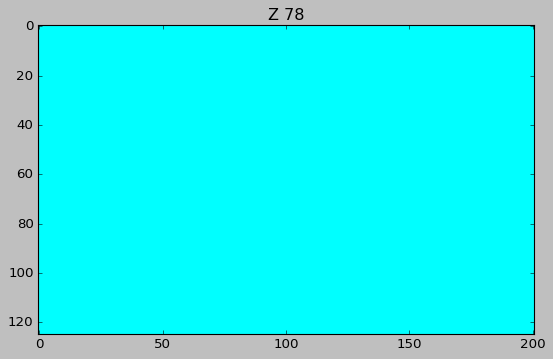

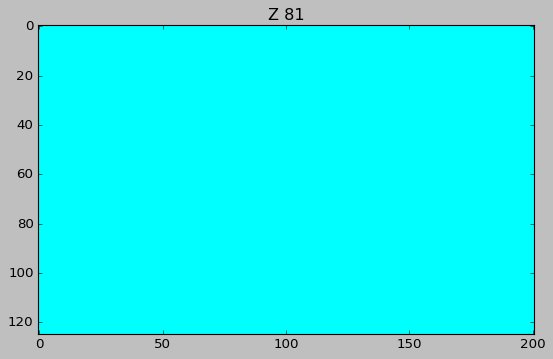

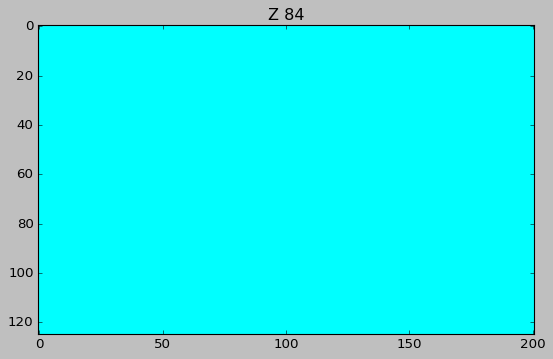

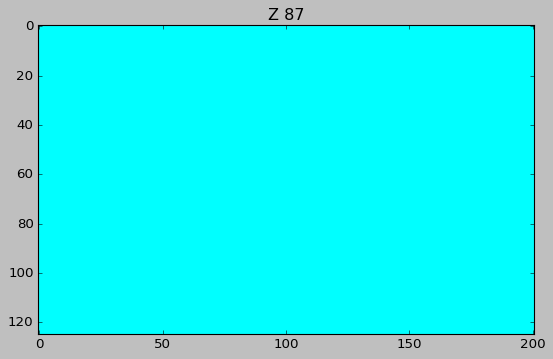

In [45]:
arr = vm
limit = 10
start = (arr.shape[2] // 2) - limit
end = start + limit * 2
nrows = end - start
ncols = 1
plt.style.use('classic')
for i in range(30, 90, 3):
    plt.title('Z {}'.format(i))
    plt.imshow(arr[:,:,i], cmap="cool")
    plt.show()